**Summary.** 

In this project facebook ad data is analysed through means of an exploratory data analysis. Metrics commonly use in ad analysis are implemented and investigated. It is assumed business performance is driven by absolute return on advertising spend and as such the ROAS metric is targeted. 
- This preliminary analysis suggests further campaigns should focus on the 30-34 age group, particularly males. 
- The advertising spend is least effectively targeted on the 45-49 age group. 
- However, the number of clicks associated with these conclusions is in some cases low and it is therefore suggested that further work aim to show the statistical significance of targeting these groups.

**Skills used:**

Programming (Python: NumPy, pandas, seaborn, matplotlib libraries).

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('KAG_conversion_data.csv')

In [32]:
print(df.shape)
print(df.columns)

(1143, 13)
Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'CTR', 'CPC'],
      dtype='object')


In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [33]:
df.interest.nunique()

40

## Creating features relevant for ad analysis
The following variables are common metrics used in ad analysis and will be added to the dataset:

- **Click-through-rate (CTR)**, percentage of how many impressions became clicks. 

A high CTR (2 percent as benchmark) is indicative of adverts being well recieved by a relevant audience. A low CTR suggests either both or one of these factors has not been achieved.
- **Conversion Rate (CR)**, percentage of clicks that result in a conversion, as defined by the campaign objectives (i.e. sale, contact form completed, downloading an e-book or spending more than a certain time viewing the website).
- **Cost Per Click (CPC)**=spent/click, on average. This must be considered in combination with other variables (i.e. CR).
- **Cost Per Conversion**, combines the CPC and CR metrics.
- **Conversion Value**, how much each conversion is worth. The target conversion value will depend on what the definition of the conversion is and how this is related to revenue returned for example, when maximising revenue is the business aim.
- **Return on Advertising Spend (ROAS)**, revenue returned as a percentage of the advertising spend.
- **Cost Per Mille (CPM)**, cost of one thousand impressions (useful metric when considering brand awareness as business performance metric).

### The first features to create are CTR and CPC.

In [4]:
df['CTR']=(df['Clicks']/df['Impressions'])*100
df['CPC']=df['Spent']/df['Clicks']

to get an initial idea of how the variables are related, look at the correlation between the following. 

In [5]:
subset_df = df[['CTR', 'CPC', 'Approved_Conversion', 'Total_Conversion', 'Impressions', 'Spent', 'Clicks']].copy()

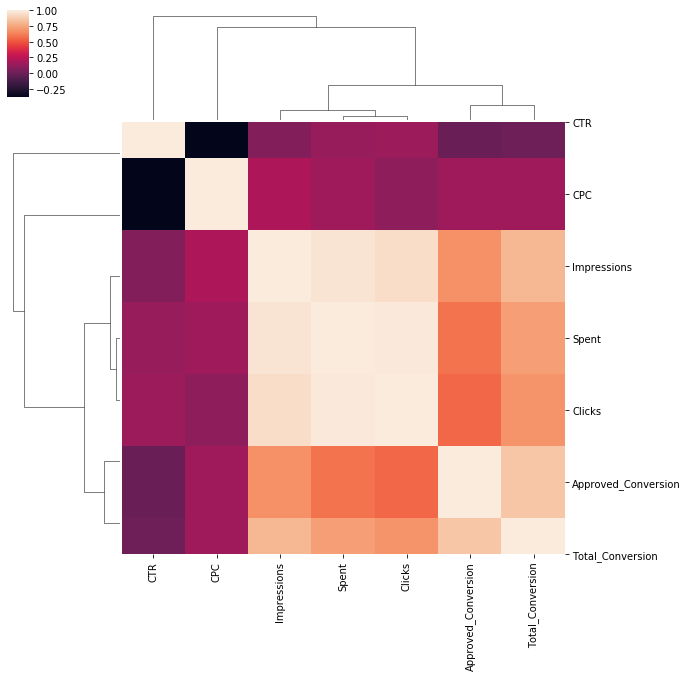

In [6]:
p1 = sns.clustermap(subset_df.corr())
#p1.savefig('plot1.png')

To look at the correlation numerically can also do the following.

In [7]:
corr = subset_df.corr(method='pearson')
corr

,CTR,CPC,Approved_Conversion,Total_Conversion,Impressions,Spent,Clicks
CTR,1.000000,-0.378854,-0.006602,0.010721,0.075914,0.140952,0.159290
CPC,-0.378854,1.000000,0.170040,0.160828,0.208556,0.165464,0.112676
Approved_Conversion,-0.006602,0.170040,1.000000,0.864034,0.684249,0.593178,0.559526
Total_Conversion,0.010721,0.160828,0.864034,1.000000,0.812838,0.725379,0.694632
Impressions,0.075914,0.208556,0.684249,0.812838,1.000000,0.970386,0.948514
Spent,0.140952,0.165464,0.593178,0.725379,0.970386,1.000000,0.992906
Clicks,0.159290,0.112676,0.559526,0.694632,0.948514,0.992906,1.000000


from output, we can see that there are strong correlation btw Spent and Clicks, as well as Spent and Total_Conversion

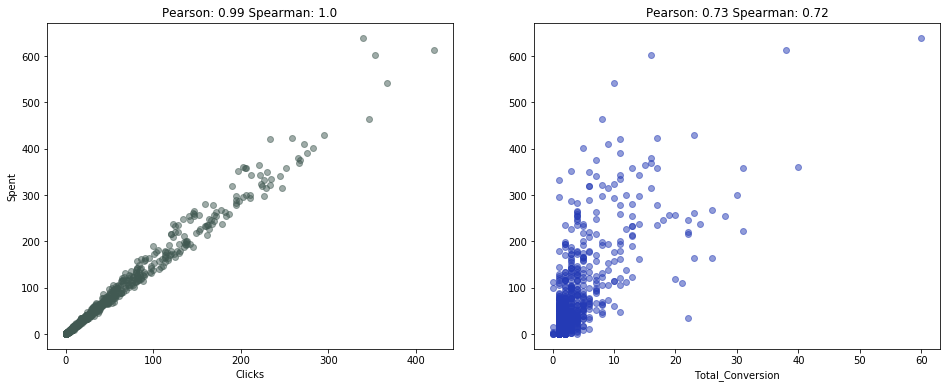

In [8]:
# plot correlated values
plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=2)

ax=ax.flatten()

cols = ['Clicks','Total_Conversion']
colors=['#415952', '#243AB5']#, '#243AB5','#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('Spent')
    i.scatter(subset_df[cols[j]], subset_df['Spent'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%subset_df.corr().loc[cols[j]]['Spent'].round(2)+' Spearman: %s'%subset_df.corr(method='spearman').loc[cols[j]]['Spent'].round(2))
    j+=1

plt.show()

It is reassuring that the higher the spend, the more clicks and although less reliably, the more conversions. 

However, in order to be able to provide an improvement in the desired business performance, in this case maximising revenue, actionable insights have to be obtained. 

The data is broken down into different campaigns, which will need to be analysed in turn.

In [9]:
df.xyz_campaign_id.value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

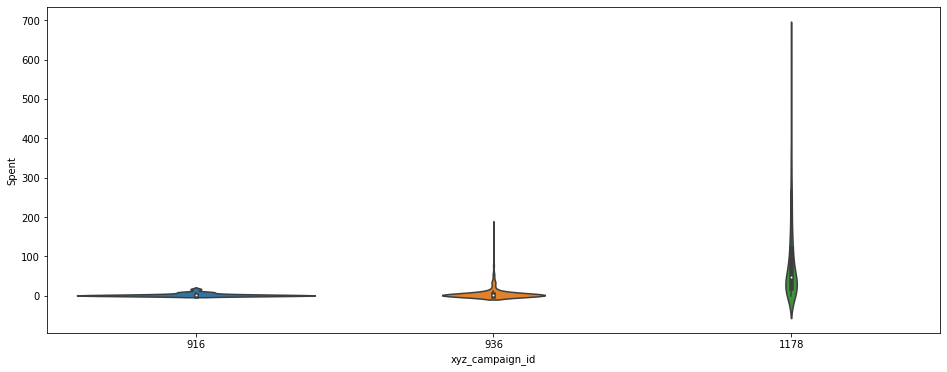

In [10]:
# violin plot: Amount spent on each campaign
ax = sns.violinplot(x="xyz_campaign_id",y='Spent',data=df)

# Looking at specific campaigns - Campaign 1178


In [11]:
cam_df=df[df["xyz_campaign_id"]==1178]
cam_df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
518,1121091,1178,144531,30-34,M,10,1194718,141,254.049996,28,14,0.011802,1.801773
519,1121092,1178,144531,30-34,M,10,637648,67,122.400000,13,5,0.010507,1.826866
520,1121094,1178,144531,30-34,M,10,24362,0,0.000000,1,1,0.000000,NaN
521,1121095,1178,144531,30-34,M,10,459690,50,86.330001,5,2,0.010877,1.726600
522,1121096,1178,144531,30-34,M,10,750060,86,161.909999,11,2,0.011466,1.882674


## Missing data
The amount of missing data was checked, as shown in the table below which shows the percentage of missing data for each variable. Missing values are only present for the CPC variable, where clicks equal 0, returning NAN.

In [12]:
columns = cam_df.columns
percentage_missing = cam_df.isnull().sum() * 100 / len(cam_df)
table_percentage_missing = pd.DataFrame({'column_name': columns,
                                 'percentage_missing': percentage_missing})

table_percentage_missing

,column_name,percentage_missing
ad_id,ad_id,0.00
xyz_campaign_id,xyz_campaign_id,0.00
fb_campaign_id,fb_campaign_id,0.00
age,age,0.00
gender,gender,0.00
interest,interest,0.00
Impressions,Impressions,0.00
Clicks,Clicks,0.00
Spent,Spent,0.00
Total_Conversion,Total_Conversion,0.00


## Distributions among different demographics
Figure shows basic count distributions for gender and age subgroups. There is no overwhelming unbalanced contributions to these subgroups.

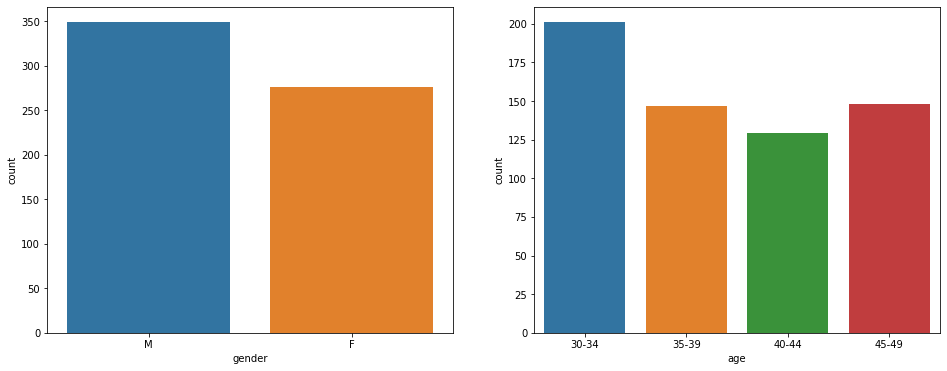

In [16]:
# Count plots for gender (left) and age (right)
fig, ax =plt.subplots(1,2)
sns.countplot(cam_df['gender'], ax=ax[0])
sns.countplot(cam_df['age'], ax=ax[1])
fig.show()

## Further feature engineering
When the business aim is to maximise revenue for advertising expenditure, the ROAS metric is very useful. However, this requires the monetary amounts from conversions (Total_conversion) and sales (Approved_conversion) be known. 



We don't have the actual numbers at our disposal here, so in the following it is assume that `an enquiry (Total conversion, conv) is worth $5`, and a `sale (Approved conversion, appConv), is worth $100`. We can now create our conversion value-based variables

In [17]:
cam_df['totConv'] = cam_df.loc[:,'Total_Conversion'] + cam_df.loc[:,'Approved_Conversion']

cam_df['conVal'] = cam_df['Total_Conversion']*5 # revnue by Total_Conversion
cam_df['appConVal'] = cam_df['Approved_Conversion'] * 100 # revnue by Approved_Conversion

cam_df['totConvVal'] = cam_df['conVal'] + cam_df['appConVal']  # total revnue

cam_df['costPerCon'] = round(cam_df['Spent'] / cam_df['totConv'], 2) # Cost Per Conversion, combines CPC and CR metrics.

cam_df['ROAS'] = round(cam_df['totConvVal'] / cam_df['Spent'], 2) #revenue returned as a percentage of the advertising spend.

cam_df['CPM'] = round((cam_df['Spent'] / cam_df['Impressions']) * 1000, 2) #cost per thousand impression

cam_df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,totConv,conVal,appConVal,totConvVal,costPerCon,ROAS,CPM
518,1121091,1178,144531,30-34,M,10,1194718,141,254.049996,28,14,0.011802,1.801773,42,140,1400,1540,6.05,6.06,0.21
519,1121092,1178,144531,30-34,M,10,637648,67,122.400000,13,5,0.010507,1.826866,18,65,500,565,6.80,4.62,0.19
520,1121094,1178,144531,30-34,M,10,24362,0,0.000000,1,1,0.000000,NaN,2,5,100,105,0.00,inf,0.00
521,1121095,1178,144531,30-34,M,10,459690,50,86.330001,5,2,0.010877,1.726600,7,25,200,225,12.33,2.61,0.19
522,1121096,1178,144531,30-34,M,10,750060,86,161.909999,11,2,0.011466,1.882674,13,55,200,255,12.45,1.57,0.22


ROAS of infinity occurs when there are 0 clicks but a conversion. This may have happened because the click wasn't tracked or it occurred at a different time and has been attributed elsewhere. Convert these values to NAN and check for missing data.


In [18]:
cam_df=cam_df.replace([np.inf, -np.inf], np.nan)

In [19]:
columns = cam_df.columns
percentage_missing = cam_df.isnull().sum() * 100 / len(cam_df)
table_percentage_missing = pd.DataFrame({'column_name': columns,
                                 'percentage_missing': percentage_missing})

table_percentage_missing

,column_name,percentage_missing
ad_id,ad_id,0.00
xyz_campaign_id,xyz_campaign_id,0.00
fb_campaign_id,fb_campaign_id,0.00
age,age,0.00
gender,gender,0.00
interest,interest,0.00
Impressions,Impressions,0.00
Clicks,Clicks,0.00
Spent,Spent,0.00
Total_Conversion,Total_Conversion,0.00


### Analysis by age, gender and interest
In order to improve a similar campaign with a view to maximising revenue return, the variables available in the dataset (in this case age, gender and interest) can be investigated further with respect to the ROAS metric.

#### Analysis by gender
Box plots of ROAS for Females and Males 

(0, 15)

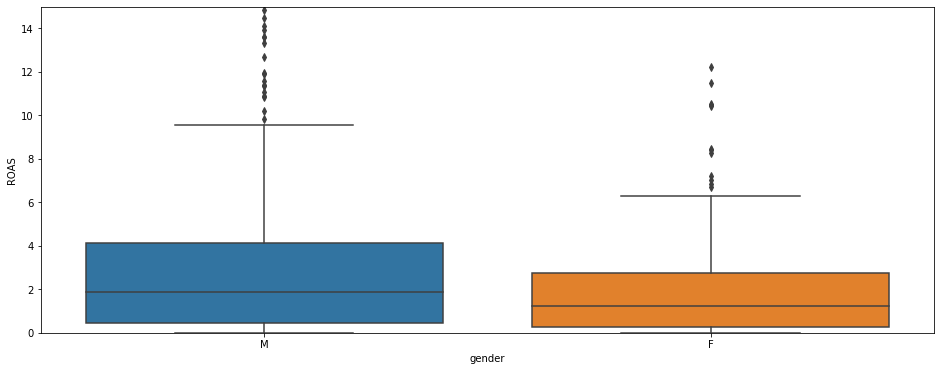

In [20]:
#  Boxplots of ROAS for females (right) and males (left)
ax=sns.boxplot(x='gender',y='ROAS',data=cam_df)
ax.set_ylim([0, 15])

In [21]:
cam_df['ROAS'][cam_df['gender']=='M'].mean()

4.504633431085043

In [22]:
cam_df['ROAS'][cam_df['gender']=='F'].mean()

2.8192279411764707

In time, the ROAS is more likely to tend towards the mean, hence this is used subsequently.

- Females mean ROAS 2.81
- Males mean ROAS 4.50<br>
`It appears that the ROAS is highly dependant on gender and therefore needs to be taken into account when interest and age are considered.`


#### Analysis by interest
The data is grouped by interest and the median, mean and sum of clicks calculated for each group, with the resulting dataframe sorted by ROAS mean descendingly.

In [23]:
grouped_interest = cam_df.groupby('interest').agg({'ROAS':['median','mean'],'Clicks':'sum'}) 
grouped_interest.columns = ['_'.join(x) for x in grouped_interest.columns.ravel()]
grouped_interest = grouped_interest.sort_values(by='ROAS_mean', ascending=0)
grouped_interest

,ROAS_median,ROAS_mean,Clicks_sum
interest,,,
104,2.750,15.512000,265
101,3.960,14.954286,524
102,4.270,10.354286,150
31,3.640,8.259286,189
112,3.210,8.060000,339
15,2.685,7.889000,1554
36,3.210,7.379231,126
65,4.380,6.996364,343
21,1.770,6.343810,493


Although ROAS mean is the metric being used, it is important to take into account the statistical significance of that value. This can be done very approximately by considering the sum of clicks, with a higher sum of clicks for a given interest group making it more likely the calculated ROAS metric is reliable, given the higher population. Given this, interest groups 101, 15 and 21 are considered further.

In [24]:
newdf_grouped_interest = cam_df[(cam_df['interest'] == 101) | (cam_df['interest'] == 15) | (cam_df['interest'] == 21)]
newdf_grouped_interest.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,totConv,conVal,appConVal,totConvVal,costPerCon,ROAS,CPM
523,1121097,1178,144532,30-34,M,15,30068,1,1.820000,1,0,0.003326,1.820000,1,5,0,5,1.82,2.75,0.06
524,1121098,1178,144532,30-34,M,15,1267550,123,236.769999,24,10,0.009704,1.924959,34,120,1000,1120,6.96,4.73,0.19
525,1121100,1178,144532,30-34,M,15,3052003,340,639.949998,60,17,0.011140,1.882206,77,300,1700,2000,8.31,3.13,0.21
526,1121101,1178,144532,30-34,M,15,29945,1,1.590000,2,1,0.003339,1.590000,3,10,100,110,0.53,69.18,0.05
527,1121102,1178,144532,30-34,M,15,357856,30,52.970000,7,3,0.008383,1.765667,10,35,300,335,5.30,6.32,0.15


Data from these interest groups is further grouped by gender and age group

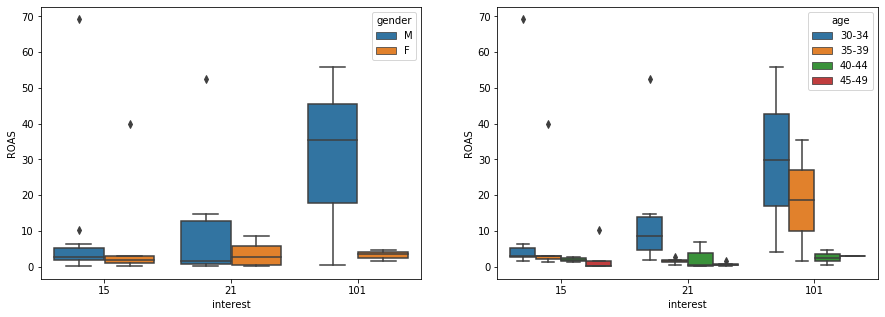

In [25]:
# Boxplots of ROAS as a function of interest, subdivided by gender (left) and age(right).
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(x='interest',y='ROAS',hue='gender', data=newdf_grouped_interest, ax=ax1)
sns.boxplot(x='interest',y='ROAS',hue='age', data=newdf_grouped_interest, ax=ax2)


These plots indicate that focussing on males with interest group 101 in the age group 30-34 would be most beneficial to maximising ROAS. However, these plots don't take into account number of clicks for each subgroup, so this is investigated in the following.

In [26]:
#grouped_gender = cam_df.groupby(['interest','gender']).agg({'ROAS':['median','mean'],'Clicks':'sum'}) 
grouped_interest_gender = newdf_grouped_interest.groupby(['interest','gender']).agg({'ROAS':['median','mean'],'Clicks':'sum'}) 
# Using ravel, and a string join, we can create better names for the columns:
grouped_interest_gender.columns = ['_'.join(x) for x in grouped_interest_gender.columns.ravel()]

grouped_interest_gender = grouped_interest_gender.sort_values(by='ROAS_mean', ascending=False)
grouped_interest_gender


ROAS_median  ROAS_mean  Clicks_sum
interest gender                                    
101      M            35.470  30.526667          17
21       M             1.620   9.626000         200
15       M             2.790   8.893333         827
         F             1.980   6.382500         727
21       F             2.600   3.360000         293
101      F             3.405   3.275000         507

When considering interest and gender, the table above suggests it might be beneficial to focus more on males with interest in group 101. However, the small number of clicks indicate this high ROAS result could be chance. Overall, when each of the interest groups 101, 21 and 15 are considered, more return is generated from males.

In [27]:
#grouped_gender = cam_df.groupby(['interest','gender']).agg({'ROAS':['median','mean'],'Clicks':'sum'}) 
grouped_interest_age = newdf_grouped_interest.groupby(['interest','age']).agg({'ROAS':['median','mean'],'Clicks':'sum'}) 
# Using ravel, and a string join, we can create better names for the columns:
grouped_interest_age.columns = ['_'.join(x) for x in grouped_interest_age.columns.ravel()]

grouped_interest_age = grouped_interest_age.sort_values(by='ROAS_mean', ascending=False)
grouped_interest_age


ROAS_median  ROAS_mean  Clicks_sum
interest age                                      
101      30-34       29.870  29.870000          86
         35-39       18.515  18.515000         169
21       30-34        8.470  12.966667         163
15       30-34        3.005  11.618750         751
         35-39        2.830   9.788000         195
101      45-49        2.850   2.850000         107
21       40-44        0.520   2.536667          60
101      40-44        2.530   2.530000         162
15       45-49        0.150   2.402000         440
         40-44        1.940   1.940000         168
21       35-39        1.470   1.480000         109
         45-49        0.450   0.598000         161

When considering interest and age, the table above suggests it might be beneficial to focus more on people in the 30-34 age group with interest in group 101. However, again, the small number of clicks indicate this high ROAS result could be chance. The group with interest group 15 and age group 30-34 still has a high ROAS but also has much more substantial clicks sum.



#### Analysis by age
The data is grouped by age and the median, mean and sum of clicks calculated for each group, with the resulting dataframe sorted by ROAS mean descendingly.



In [28]:
grouped_age = cam_df.groupby('age').agg({'ROAS':['median','mean'],'Clicks':'sum'}) 
# Using ravel, and a string join, we can create better names for the columns:
grouped_age.columns = ['_'.join(x) for x in grouped_age.columns.ravel()]

grouped_age = grouped_age.sort_values(by='ROAS_mean', ascending=0)
grouped_age.head(10)

,ROAS_median,ROAS_mean,Clicks_sum
age,,,
30-34,2.75,6.231302,9140
35-39,1.65,3.272483,6802
40-44,1.23,2.991094,7411
45-49,0.76,1.683311,12715


The table above again suggests focussing on the 30-34 age group. Figure 7 shows the ROAS as a function of age group subdivided by gender and interest group (15,21 or 101). Again the 30-34 age group is highlighted, particularly for males and for the interest group 101.



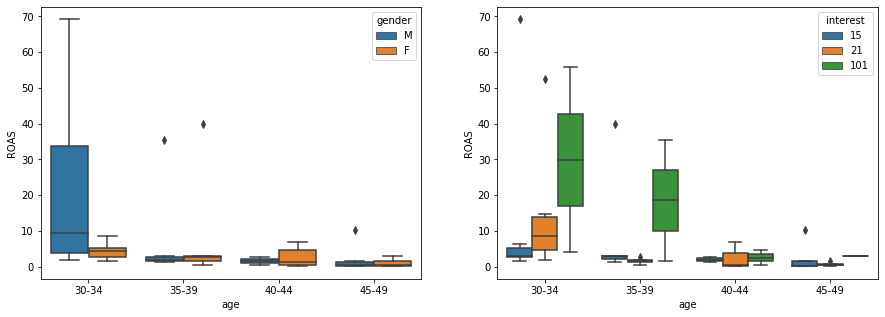

In [29]:
# Boxplots of ROAS as a function of age, subdivided by gender (left) and interest(right).
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(x='age',y='ROAS',hue='gender', data=newdf_grouped_interest, ax=ax1)
sns.boxplot(x='age',y='ROAS',hue='interest', data=newdf_grouped_interest, ax=ax2)



In [30]:
grouped_age_gender = cam_df.groupby(['age','gender']).agg({'ROAS':['median','mean'],'Clicks':'sum'}) 
grouped_age_gender.columns = ['_'.join(x) for x in grouped_age_gender.columns.ravel()]
grouped_age_gender = grouped_age_gender.sort_values(by='ROAS_mean', ascending=False)
grouped_age_gender

ROAS_median  ROAS_mean  Clicks_sum
age   gender                                    
30-34 M             3.130   7.257664        4263
      F             2.350   4.939294        4877
40-44 M             1.625   3.903529        2492
35-39 M             2.025   3.761023        2873
      F             1.420   2.518246        3929
45-49 M             0.960   2.091026        4247
40-44 F             0.850   1.957000        4919
45-49 F             0.580   1.229000        8468

Grouping by gender in addition verifies that the group age group 30-34 is most important to focus on. The least effective age group to focus on would be the 45-49 age group. The gender split in performance accross age groups is less apparent than which was observed for interests.

### Analysis by age, gender and interest
The data is grouped by age, interest and gender and the median, mean and sum of clicks calculated for each group, with the resulting dataframe sorted by ROAS mean descendingly. This also indicates that the 30-34 age group is of importance and should be targeted further. However, now because the data has been subdivided so much, statistics available for each subgroup is more limited, making any conclusions less reliable.



## Conclusions
This project has been an exploratory data analysis using facebook ad data. It has assumed business performance is determined by absolute return and as such the ROAS metric has been used to try and identify how to generate better performance had a similar campaign been run. Sum of clicks for each group identified was also used as an approximate indicator of the validity of the mean ROAS measured. The findings indicate a similar campaign should:

- focus on the 30-34 age group.
- focus on males.
- focus on groups with interests 15,21 and 101.

The campaign is least effective when focussing on:
- the 45-49 age group.
- females in this age group.

In further work the significance of these findings should be investigated.
